# Model Building

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:

train_datagen = ImageDataGenerator(rescale=1/255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [3]:
test_datagen = ImageDataGenerator(rescale=1/255)

In [4]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten

# Apply ImageDataGenerator Functionality To Train And Test set

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True, vertical_flip=False)

In [7]:
test_datagen= ImageDataGenerator(rescale=1./255)

In [8]:
x_train = train_datagen.flow_from_directory(r"C:\Users\manoj\Downloads\conversation engine for deaf and dumb\Dataset\training_set",target_size=(64,64), batch_size=300,
                                          class_mode='categorical', color_mode = "grayscale")

Found 15750 images belonging to 9 classes.


In [9]:
x_test = test_datagen.flow_from_directory(r"C:\Users\manoj\Downloads\conversation engine for deaf and dumb\Dataset\test_set",target_size=(64,64), batch_size=300,
                                          class_mode='categorical', color_mode = "grayscale")

Found 2248 images belonging to 9 classes.


In [10]:
model=Sequential()
model.add(Convolution2D(32,(3,3),activation="relu",input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(200,activation='relu'))
model.add(Dense(9,activation="softmax"))
model.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer='adam')


In [11]:
len(x_train)

53

In [12]:
len(x_test)

8

In [16]:
model.save("aslpng.h5")

# Testing the model

In [17]:
from keras.models import load_model
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image 
import numpy as np

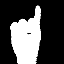

In [19]:
model=load_model("aslpng.h5")
img = image.load_img(r"10.png",target_size=(64,64))
img

In [20]:
x = image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [21]:
x.shape

(64, 64, 3)

In [22]:
x = np.expand_dims(x,axis=0)
x.shape

(1, 64, 64, 3)

In [23]:
pred = model.predict(x)

1/1 [==============================] - 0s 167ms/step


In [24]:
class_name=["A","B","C","D","E","F","G","H","I"]
pred_id = pred.argmax(axis=1)[0]
pred_id

7

In [25]:
print("the alphabet is ",str(class_name[pred_id]))

the alphabet is  H
